In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Flatten,Dropout,Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

In [2]:
train_path='/content/drive/MyDrive/Historical Building Cracks1/Training'
test_path='/content/drive/MyDrive/Historical Building Cracks1/Testing'
EPOCHS=10
BATCH_SIZE=32
RANDOM_SEED=42

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/Historical Building Cracks1'

In [5]:
import os

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/Historical Building Cracks1'

# Join the path to your dataset folder with the specific dataset directory
dataset_path = os.path.join(drive_path, 'Training', 'Testing')

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [8]:
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Historical Building Cracks1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Historical Building Cracks1/Testing/out5.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/out98.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/74.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/529.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/531.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/548.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/591.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/588.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/610.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/630.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/808.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/832.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/828.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/831.jpg
/content/drive/MyDrive/Historical Building Cracks1/Testing/8

In [11]:
dir='/content/drive/MyDrive/Historical Building Cracks1'
import tensorflow as tf
import h5py
import numpy as np
import os
import cv2
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler
%config Completer.use_jedi = False

In [12]:
x_dataset=[]
y_dataset=[]
src=os.listdir('/content/drive/MyDrive/Historical Building Cracks1/Testing')
i=0
for filename in src:
    full_file_name='/content/drive/MyDrive/Historical Building Cracks1/Testing'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=0
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [13]:
src=os.listdir('/content/drive/MyDrive/Historical Building Cracks1/Training')
for filename in src:
    full_file_name='/content/drive/MyDrive/Historical Building Cracks1/Training'+filename
    x=cv2.imread(full_file_name)
    x=np.array(x,dtype='float32')
    y=1
    y=np.array(y,dtype='float32')
    x=x/255.0
    x=cv2.resize(x,(224,224))
    x_dataset.append(x)
    y_dataset.append(y)
    i=i+1
    print(i)

756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004

In [14]:
X_dataset=np.array(x_dataset)
Y_dataset=np.array(y_dataset)
y_dataset=Y_dataset.reshape((3893,1))

In [15]:
from sklearn.utils import shuffle
X_dataset,Y_dataset=shuffle(X_dataset,Y_dataset,random_state=0)

In [18]:
yes_len=0
no_len=0
for i in range(3893):
    if Y_dataset[i]==0:
        no_len+=1
    else:
        yes_len+=1
print(yes_len)
print(no_len)

3138
755


<Axes: >

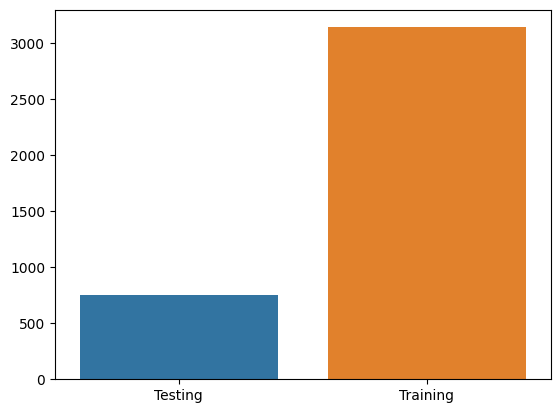

In [19]:
import seaborn as sns
sns.barplot(x=['Testing','Training'],y=[no_len,yes_len])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_dataset,Y_dataset,test_size=0.20)

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

# Misalnya, Anda memiliki dua kelas (0 dan 1)
n_splits = 2  # Jumlah lipatan (folds)
test_size = 0.5  # Ukuran set tes (setengah dari data)

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=1)

# Kemudian, Anda dapat mengggunakan 'sss.split(x_train, y_train)' untuk mendapatkan indeks lipatan
for train_index, test_index in sss.split(x_train, y_train):
    X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

# Misalnya, Anda memiliki dua kelas (0 dan 1)
n_splits = 5  # Jumlah lipatan (folds)
test_size = 0.2  # Ukuran set tes (bisa diubah sesuai kebutuhan)

sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=1)

# Kemudian, Anda dapat mengggunakan 'sss.split(x_train, y_train)' untuk mendapatkan indeks lipatan
for train_index, test_index in sss.split(x_train, y_train):
    X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

# Selanjutnya, Anda dapat menggunakan indeks ini untuk melatih dan menguji model pada setiap lipatan

In [23]:
nasnet=tf.keras.applications.inception_v3.InceptionV3(include_top=False,input_shape=(224,224,3))
x=tf.keras.layers.Flatten()(nasnet.output)
x=tf.keras.layers.Dense(1)(x)
out=tf.keras.layers.Activation(activation='sigmoid')(x)

model=tf.keras.Model(inputs=nasnet.input,outputs=out)

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

87910968/87910968 [==============================] - 0s 0us/step


In [25]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc,roc_curve
from matplotlib import pyplot as plt

In [26]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/Historical Building Cracks1'

In [27]:
# Define input shape
input_shape = (224, 224, 3)  # Sesuaikan dengan persyaratan input NASNet

# Load pre-trained NASNet model
base_model = tf.keras.applications.NASNetMobile(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet')

19993432/19993432 [==============================] - 0s 0us/step


In [28]:
# Tambahkan lapisan tambahan
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # Diasumsikan klasifikasi biner

In [29]:
# Buat model
model = Model(inputs=base_model.input, outputs=output)

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# Tentukan path ke folder dataset pelatihan dan pengujian
training_dataset_path = os.path.join(drive_path, 'Training')
testing_dataset_path = os.path.join(drive_path, 'Testing')

In [37]:
# akses direktori pada Google Drive
path = '/content/drive/MyDrive/Historical Building Cracks1/'

In [6]:
train_path='/content/drive/MyDrive/Historical Building Cracks1/Testing'
test_path='/content/drive/MyDrive/Historical Building Cracks/Training'
EPOCHS=10
BATCH_SIZE=32
RANDOM_SEED=42

In [7]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/drive/MyDrive/Historical Building Cracks1'
print(os.listdir(base_dir))

['Testing', 'Training']


In [83]:
#After extracting its contents, assign variables with the proper file path for the training and validation set
drive_path = os.path.join(drive_path, 'Training')
dataset_path = os.path.join(drive_path, 'Testing')

In [84]:
labels=os.listdir(train_path)
labels

['out5.jpg',
 'out98.jpg',
 '74.jpg',
 '529.jpg',
 '531.jpg',
 '548.jpg',
 '591.jpg',
 '588.jpg',
 '610.jpg',
 '630.jpg',
 '808.jpg',
 '832.jpg',
 '828.jpg',
 '831.jpg',
 '851.jpg',
 '910.jpg',
 '950.jpg',
 '1068.jpg',
 '1129.jpg',
 '1150.jpg',
 '1210.jpg',
 '1308.jpg',
 '1328.jpg',
 '1332.jpg',
 '1390.jpg',
 '1491.jpg',
 '1588.jpg',
 '1585.jpg',
 '1606.jpg',
 '1610.jpg',
 '1633.jpg',
 '1627.jpg',
 '1626.jpg',
 '1649.jpg',
 '1669.jpg',
 '1689.jpg',
 '1729.jpg',
 '1730.jpg',
 '1771.jpg',
 '1792.jpg',
 '1789.jpg',
 '1825.jpg',
 '1845.jpg',
 '1848.jpg',
 '1849.jpg',
 '1851.jpg',
 '1852.jpg',
 '1866.jpg',
 '1870.jpg',
 '1888.jpg',
 '1886.jpg',
 '1887.jpg',
 '1908.jpg',
 '1928.jpg',
 '1948.jpg',
 '1969.jpg',
 '1989.jpg',
 '2009.jpg',
 '2010.jpg',
 '2011.jpg',
 '2031.jpg',
 '2052.jpg',
 '2068.jpg',
 '2072.jpg',
 '2166.jpg',
 '2173.jpg',
 '2186.jpg',
 '2205.jpg',
 '2206.jpg',
 '2207.jpg',
 '2224.jpg',
 '2227.jpg',
 '2225.jpg',
 '2232.jpg',
 '2226.jpg',
 '2243.jpg',
 '2245.jpg',
 '2244.jpg',
 

In [88]:
def process(data):
    path=Path(data)#converting the string to path
    filepaths=list(path.glob(r"*/*.jpg"))#Going through all the subpaths
    labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))#Separating the label from filepath and storing it
    df1=pd.Series(filepaths,name='filepaths').astype(str)
    df2=pd.Series(labels,name='labels')
    df=pd.concat([df1,df2],axis=1)#Making the dataframe
    return df

In [89]:
df_train=process(train_path)
df_test=process(test_path)

<ipython-input-88-86ea0da36b6c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1=pd.Series(filepaths,name='filepaths').astype(str)
<ipython-input-88-86ea0da36b6c>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2=pd.Series(labels,name='labels')
<ipython-input-88-86ea0da36b6c>:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df1=pd.Series(filepaths,name='filepaths').astype(str)
<ipython-input-88-86ea0da36b6c>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2=pd.Series(labels,name='labels')


In [90]:
train_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
test_generator=ImageDataGenerator( preprocessing_function=preprocess_input)

In [91]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan path dataset
train_data_dir = '/content/drive/MyDrive/Historical Building Cracks1/Training'
validation_data_dir = '/content/drive/MyDrive/Historical Building Cracks1/Testing'

In [92]:
# Pengaturan untuk prapemrosesan gambar
img_width, img_height = 150, 150
batch_size = 32


In [93]:
 #Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 3893


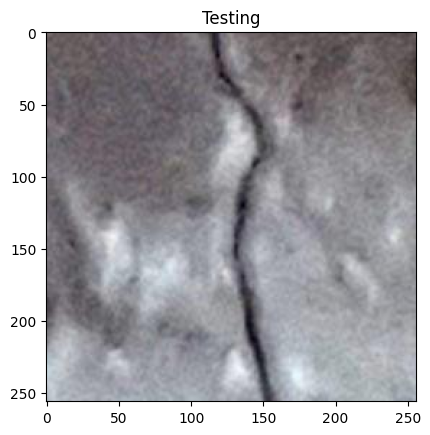

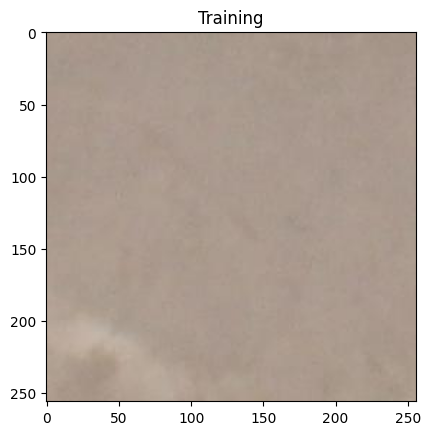

In [95]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [42]:
import os

# Define the path to your dataset in Google Drive
drive_path = '/content/drive/MyDrive/Historical Building Cracks1'

# Join the path to your dataset folder with the specific dataset directory
dataset_path = os.path.join(drive_path, 'Training', 'Testing')

In [44]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/drive/MyDrive/Historical Building Cracks1'

In [45]:
#After extracting its contents, assign variables with the proper file path for the training and validation set
drive_path = os.path.join(drive_path, 'Training')
dataset_path = os.path.join(drive_path, 'Testing')

In [46]:
train_crack_dir = os.path.join(drive_path, 'Training')  # directory with our training crack pictures
train_non_crack_dir = os.path.join(drive_path, 'Testing')  # directory with our training non-crack pictures
validation_crack_dir = os.path.join(dataset_path, 'Training')  # directory with our validation crack pictures
validation_non_crack_dir = os.path.join(dataset_path, 'Testing')  # directory with our validation non-crack pictures

In [ ]:
import os

if os.path.exists(train_crack_dir):
    num_crack_tr = len(os.listdir(train_crack_dir))

else:
    print(f"Directory '{train_crack_dir}' does not exist.")



In [50]:
if os.path.exists(validation_crack_dir):
    num_crack_val = len(os.listdir(validation_crack_dir))

else:
    print(f"Directory '{validation_crack_dir}' does not exist.")

Directory '/content/drive/MyDrive/Historical Building Cracks1/Training/Testing/Training' does not exist.


In [48]:
#Setting up variables to use while pre-processing the dataset and training the network
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [49]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [51]:
train_crack_dir = os.path.join(drive_path, 'Training/Testing')

In [52]:
# Path ke direktori "train/crack"
train_crack_dir = os.path.join(drive_path, '/content/drive/MyDrive/Historical Building Cracks1')

# Membuat generator gambar dari direktori "train/crack"
train_crack_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_crack_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 3893 images belonging to 2 classes.


In [53]:
# Path ke direktori "validation/crack"
validation_crack_dir = os.path.join(drive_path, '/content/drive/MyDrive/Historical Building Cracks1')

# Membuat generator gambar dari direktori "validation/crack"
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_crack_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

Found 3893 images belonging to 2 classes.


In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [74]:
# Tambahkan layer-layer CNN dan Dense sesuai kebutuhan
model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))  # Tambahkan tanda kurung tutup di sini
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))  # Lapisan output dengan satu neuron (untuk klasifikasi biner)
model.add(Activation('sigmoid'))

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke direktori "train/crack"
train_crack_dir = '/content/drive/MyDrive/Historical Building Cracks1/train/crack'  # Sesuaikan path ini
validation_crack_dir = '/content/drive/MyDrive/Historical Building Cracks1/validation/crack'  # Sesuaikan path ini

# Inisialisasi objek ImageDataGenerator untuk augmentasi gambar
train_image_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_image_generator = ImageDataGenerator(rescale=1.0/255)



In [75]:
# Kompilasi model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [77]:
# Latih model
epochs = 10  # Sesuaikan dengan jumlah epoch yang Anda inginkan
history = model.fit(
    train_crack_gen,
    steps_per_epoch=len(train_crack_gen),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)

Epoch 1/10
31/31 [==============================] - 219s 7s/step - loss: 0.4878 - accuracy: 0.8063 - val_loss: 0.4517 - val_accuracy: 0.8063
Epoch 2/10
31/31 [==============================] - 218s 7s/step - loss: 0.4345 - accuracy: 0.8099 - val_loss: 0.6349 - val_accuracy: 0.5877
Epoch 3/10
31/31 [==============================] - 218s 7s/step - loss: 0.4753 - accuracy: 0.8094 - val_loss: 0.4161 - val_accuracy: 0.8374
Epoch 4/10
31/31 [==============================] - 218s 7s/step - loss: 0.3856 - accuracy: 0.8333 - val_loss: 0.3676 - val_accuracy: 0.8631
Epoch 5/10
31/31 [==============================] - 218s 7s/step - loss: 0.3587 - accuracy: 0.8431 - val_loss: 0.3295 - val_accuracy: 0.8806
Epoch 6/10
31/31 [==============================] - 217s 7s/step - loss: 0.3377 - accuracy: 0.8644 - val_loss: 0.3271 - val_accuracy: 0.8813
Epoch 7/10
31/31 [==============================] - 182s 6s/step - loss: 0.3072 - accuracy: 0.8739 - val_loss: 0.2746 - val_accuracy: 0.8939
Epoch 8/10
31

In [80]:
# Hitung akurasi
test_loss, test_accuracy = model.evaluate(train_crack_gen, steps=len(train_crack_gen))
print(f"Test Accuracy: {test_accuracy}")

31/31 [==============================] - 49s 2s/step - loss: 0.2358 - accuracy: 0.9116
Test Accuracy: 0.9116362929344177


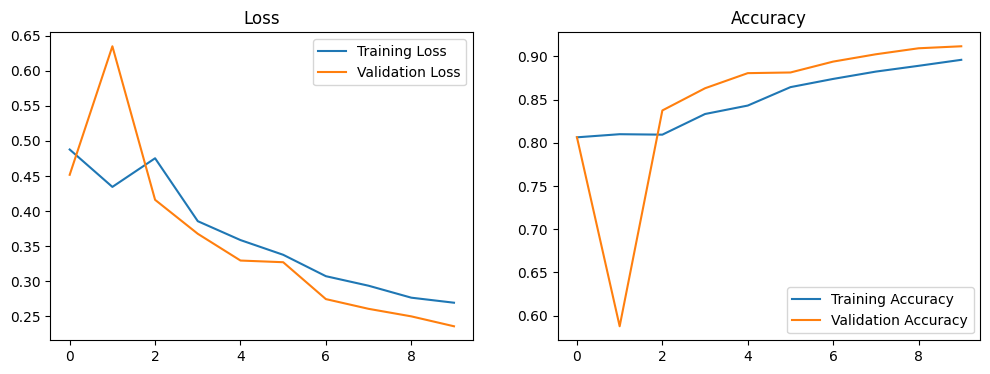

In [81]:
# Plot grafik loss dan akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

In [98]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [99]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 18, 18, 64)       